## Advanced Lane Finding Project

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

---
## First, I'll compute the camera calibration using chessboard images

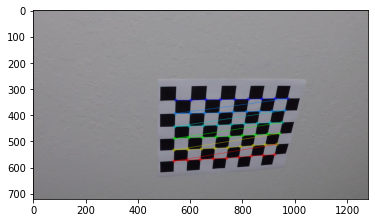

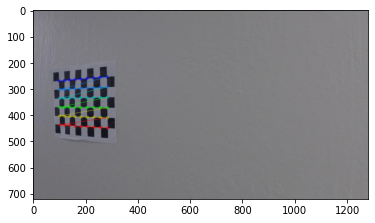

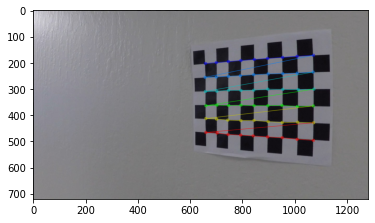

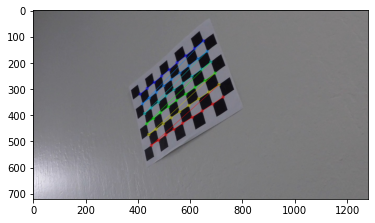

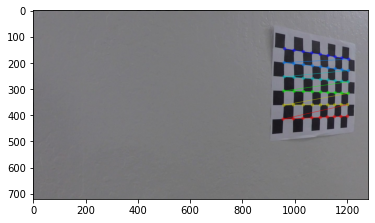

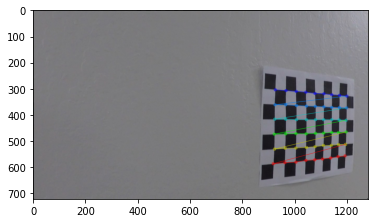

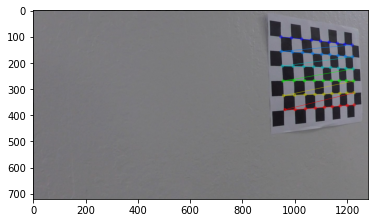

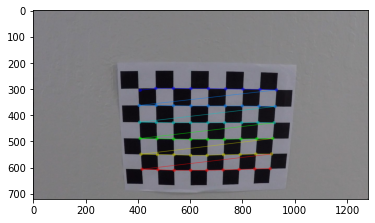

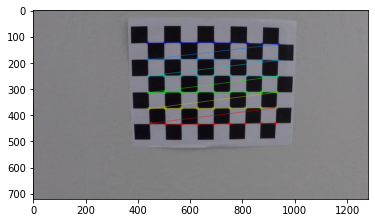

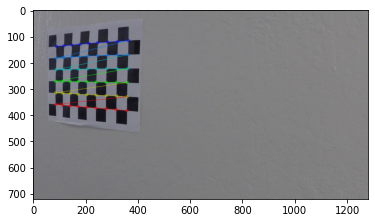

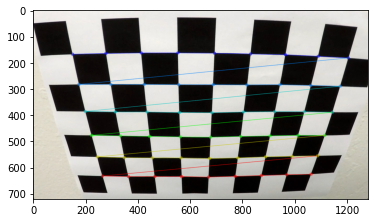

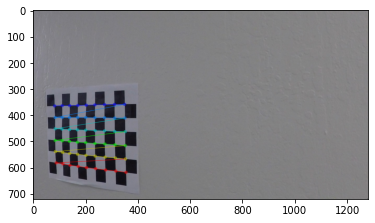

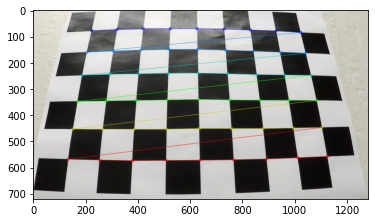

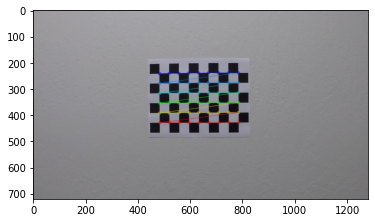

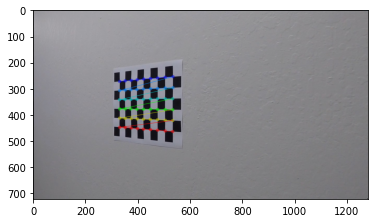

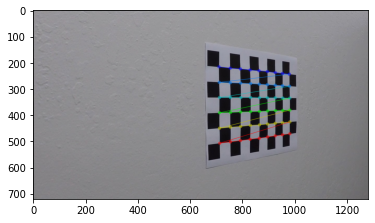

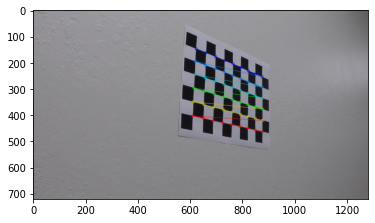

In [15]:
import numpy as np
import cv2
import glob
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.
images = glob.glob('camera_cal/calibration*.jpg')

for fname in images:
    img = mpimg.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, (9,6),None)
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)
        img = cv2.drawChessboardCorners(img, (9,6), corners, ret)
        plt.imshow(img)
        plt.show()
        
y, x, c = img.shape
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, (x,y), None, None)

## distortion coefficients

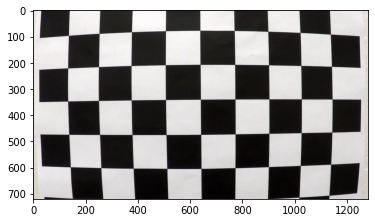

In [47]:
img = mpimg.imread("camera_cal/calibration1.jpg")
plt.imshow(img)
plt.imsave('output_images/ex_dist.png', img)

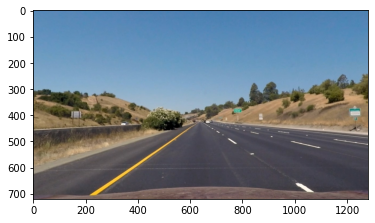

In [53]:
img2 = cv2.undistort(img, mtx, dist, None, mtx)
plt.imshow(img2)
plt.imsave('output_images/ex_disted.png', img2)

In [54]:
def calib_undist(img, objpoints, imgpoints):
    y, x, c = img.shape
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, (x,y), None, None)
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    return undist

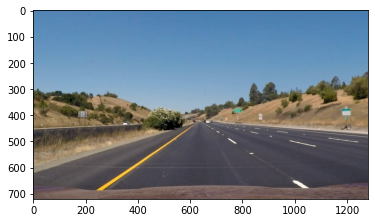

In [55]:
img = mpimg.imread("test_images/straight_lines1.jpg")
plt.imshow(img)
plt.imsave('output_images/dist.png', img)

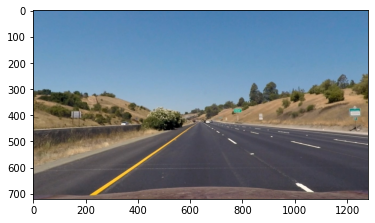

In [56]:
cal_undist_img = calib_undist(img, objpoints, imgpoints)
plt.imshow(cal_undist_img)
plt.imsave('output_images/disted.png', cal_undist_img)

## Bird eye view

In [57]:
print(x,y)

1280 720


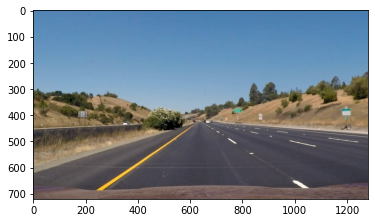

In [58]:
src = np.array([[725,455], [555,455], [1280, 680], [0, 680]], np.float32)
dst = np.array([[1280, 0],[0, 0],[1280, 720],[0, 720]], np.float32)

M = cv2.getPerspectiveTransform(src, dst)
bird = cv2.warpPerspective(cal_undist_img, M, (x,y) , flags=cv2.INTER_LINEAR)
plt.imshow(img)
plt.imsave('output_images/raw.png', img)

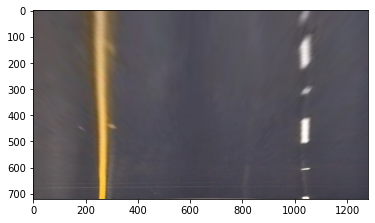

In [59]:
plt.imshow(bird)
plt.imsave('output_images/bird.png', bird)

In [24]:
import numpy as np
import cv2
import glob
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

test_images = glob.glob('test_images/*.jpg')

from helper import *
from line import Line

mtx = np.array([[1.15777829e+03, 0.00000000e+00, 6.67113866e+02],
       [0.00000000e+00, 1.15282230e+03, 3.86124658e+02],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])
dist = np.array([[-0.24688572, -0.02372825, -0.00109832,  0.00035104, -0.00260431]])
line = Line(mtx, dist,  thresh=(80, 255))

src = np.array([[384, 600], 
                [246, 700],
                [907, 600],
                [1053, 700]],
               dtype=np.float32)
z = 2
src = np.array([[383 + z, 600],
                [246, 700],
                [908 - z, 600],
                [1053, 700]],
               dtype=np.float32)
y_len = 80
target = np.array([[2*(246 - 640) // 3 + 640, 700-y_len],
                [2*(246 - 640) // 3 + 640, 700],
                [2*(1053 - 640) // 3 + 640, 700-y_len],
                [2*(1053 - 640) // 3 + 640, 700]], dtype=np.float32)

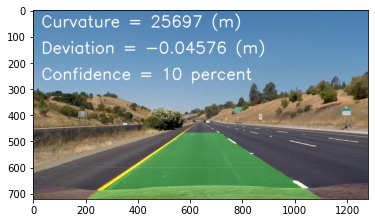

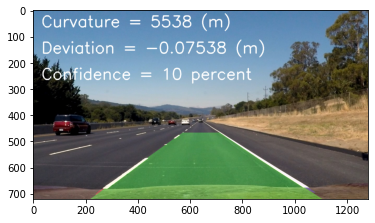

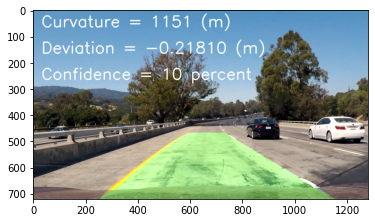

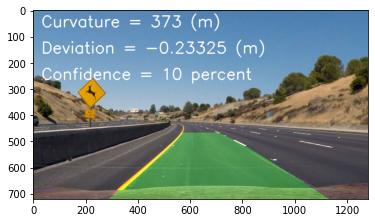

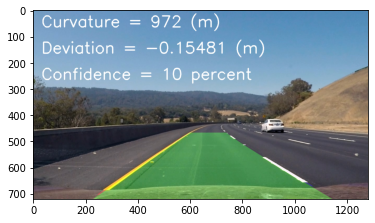

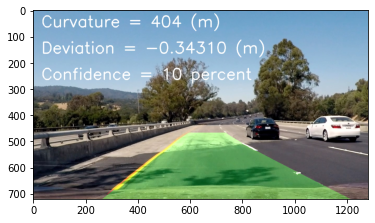

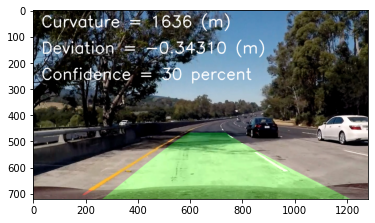

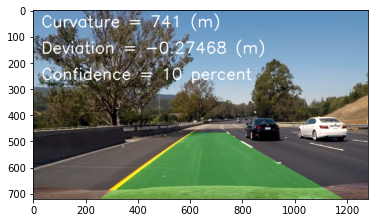

In [26]:
line.return_point=-1
for image in test_images[:]:
    line.confidence = 0
    img = mpimg.imread(image)
    result = line(img)
    plt.imshow(result)
    plt.show()

In [31]:
from moviepy.editor import VideoFileClip
from IPython.display import HTML

white_output = 'project_video_output.mp4'
def binary_video(img):
    line.return_point = 2
    binary = line(img)
    line.return_point = -1
    return  binary

In [32]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

line = Line(mtx, dist, thresh=(80, 255))
project_output = 'project_video_output.mp4'
binary_output = 'Binary_Warped.mp4'


clip1 = VideoFileClip("project_video.mp4")#.subclip(18,23)
_ = clip1.fl_image(line) #NOTE: this function expects color images!!
%time _.write_videofile(project_output, audio=False)

t:   0%|                                                                            | 0/1260 [00:00<?, ?it/s, now=None]

Moviepy - Building video project_video_output.mp4.
Moviepy - Writing video project_video_output.mp4



Moviepy - Done !
Moviepy - video ready project_video_output.mp4
Wall time: 4min 24s


In [33]:
HTML("""
<video width="960" height="540" controls>
  <source src="project_video_output.mp4">
</video>
""")

In [34]:
clip2 = VideoFileClip("project_video.mp4")#.subclip(18,23)
_ = clip2.fl_image(binary_video) #NOTE: this function expects color images!!
%time _.write_videofile('Binary_Warped.mp4', audio=False)

t:   0%|                                                                            | 0/1260 [00:00<?, ?it/s, now=None]

Moviepy - Building video Binary_Warped.mp4.
Moviepy - Writing video Binary_Warped.mp4



Moviepy - Done !
Moviepy - video ready Binary_Warped.mp4
Wall time: 3min 57s


In [35]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format('Binary_Warped.mp4'))

In [36]:
line = Line(mtx, dist)
clip1 = VideoFileClip("challenge_video.mp4")
_ = clip1.fl_image(line) #NOTE: this function expects color images!!
%time _.write_videofile("challenge_video_output.mp4", audio=False)

t:   0%|                                                                             | 0/485 [00:00<?, ?it/s, now=None]

Moviepy - Building video challenge_video_output.mp4.
Moviepy - Writing video challenge_video_output.mp4



Moviepy - Done !
Moviepy - video ready challenge_video_output.mp4
Wall time: 1min 41s


In [37]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format("challenge_video_output.mp4"))

In [38]:
def binary_video(img):
    line.return_point = 2
    binary = line(img)
    line.return_point = -1
    return  binary

line = Line(mtx, dist)
clip1 = VideoFileClip("challenge_video.mp4")
_ = clip1.fl_image(binary_video) #NOTE: this function expects color images!!
%time _.write_videofile("challenge_binary.mp4", audio=False)

t:   0%|                                                                             | 0/485 [00:00<?, ?it/s, now=None]

Moviepy - Building video challenge_binary.mp4.
Moviepy - Writing video challenge_binary.mp4



Moviepy - Done !
Moviepy - video ready challenge_binary.mp4
Wall time: 1min 30s


In [39]:

HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format('challenge_binary.mp4'))

In [40]:
line = Line(mtx, dist)
clip = VideoFileClip("harder_challenge_video.mp4")
_ = clip.fl_image(line) #NOTE: this function expects color images!!
%time _.write_videofile('harder_challenge_output.mp4', audio=False)


t:   0%|                                                                            | 0/1199 [00:00<?, ?it/s, now=None]

Moviepy - Building video harder_challenge_output.mp4.
Moviepy - Writing video harder_challenge_output.mp4



Moviepy - Done !
Moviepy - video ready harder_challenge_output.mp4
Wall time: 4min 5s


In [41]:
HTML("""
<video width="960" height="540" controls>
  <source src="harder_challenge_output.mp4">
</video>
""")

In [42]:
clip = VideoFileClip("harder_challenge_video.mp4")
_ = clip.fl_image(binary_video) #NOTE: this function expects color images!!
%time _.write_videofile('harder_challenge_binary.mp4', audio=False)

t:   0%|                                                                            | 0/1199 [00:00<?, ?it/s, now=None]

Moviepy - Building video harder_challenge_binary.mp4.
Moviepy - Writing video harder_challenge_binary.mp4



Moviepy - Done !
Moviepy - video ready harder_challenge_binary.mp4
Wall time: 3min 46s


In [43]:
HTML("""
<video width="960" height="540" controls>
  <source src="harder_challenge_binary.mp4">
</video>
""")

In [44]:
HTML("""
<video width="960" height="540" controls>
  <source src="harder_challenge_video.mp4">
</video>
""")